In [102]:
!pip install pandas matplotlib


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [103]:
import pandas as pd
from matplotlib import pyplot as plt

In [104]:
df = pd.read_csv('adam2_mup.csv')
#df = pd.read_csv('sgd_mup.csv')

In [144]:
def lr_curve(df, field, use_mup=None):
    # increase plot font size
    plt.rcParams.update({'font.size': 16})
    df2 = df.groupby(['hidden_size', 'use_mup'])
    for name, group in df2:
        if name[1]:
            if use_mup is not None and not use_mup:
                continue
            label = f'mup {name[0]}'
        else:
            if use_mup is not None and use_mup:
                continue
            label = f'std {name[0]}'
        group = group.sort_values('lr')
        print(f"{name[0]}: {group['lr'].iloc[group[field].argmin().item()]}")
        plt.semilogx(group['lr'], group[field], label=label, marker='x', linestyle=':')
    plt.xlabel('lr')
    plt.ylabel(field)
    plt.legend()
    plt.show()

512: 0.25
1024: 0.125
2048: 0.25
4096: 0.25
9192: 0.125


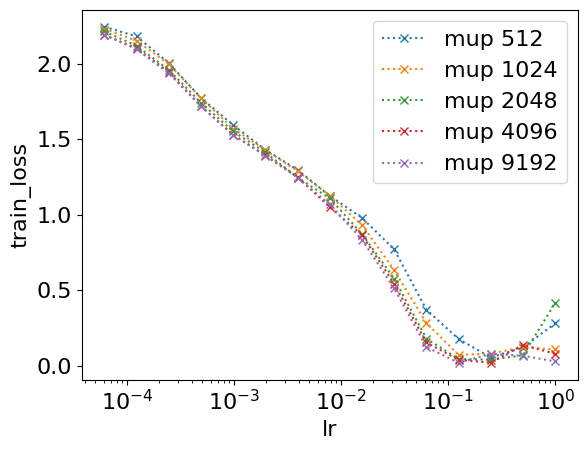

512: 0.01563
1024: 0.01563
2048: 0.01563
4096: 0.03125
9192: 0.03125


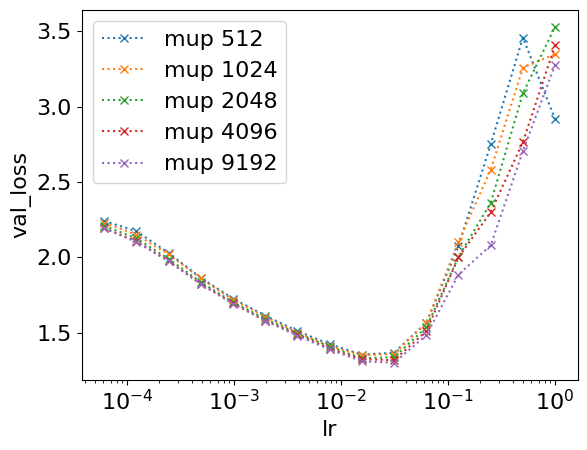

512: 6.103e-05
1024: 6.103e-05
2048: 6.103e-05
4096: 6.103e-05
9192: 6.103e-05


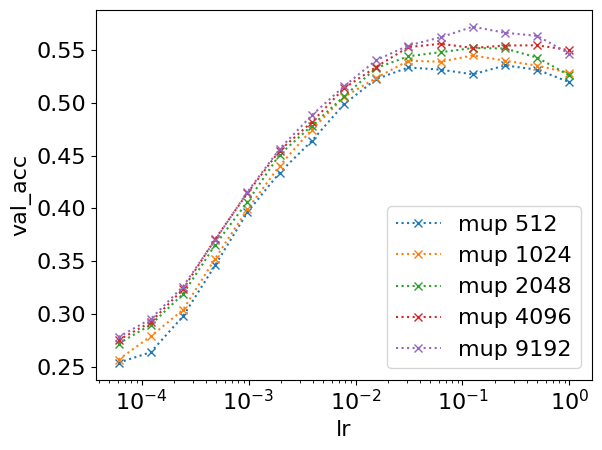

In [148]:
lr_curve(df, 'train_loss', use_mup=True)
lr_curve(df, 'val_loss', use_mup=True)
lr_curve(df, 'val_acc', use_mup=True)